Isha's Code 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
path ='/content/drive/MyDrive/TimeSeriesProject/Data/finalData.csv'
df =pd.read_csv(path)
df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,avgTemp
count,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,...,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,477.000000,4018.000000,4018.000000
mean,15.466053,7.138751,11.267422,14.421279,4.630861,9.432354,4.438626,65.340692,2.509466,42.906919,...,184.185665,1016.766775,64.127899,14.728223,146.765281,12.663813,5.562718,14.591195,0.483064,11.302402
std,11.747958,10.824730,11.127035,13.672216,13.362471,13.419564,10.527819,12.109194,6.587489,49.500485,...,100.429966,7.157438,25.160151,2.222321,94.370782,8.160757,2.722988,14.584244,0.288613,11.159215
min,-22.500000,-29.700000,-26.700000,-36.200000,-45.800000,-40.400000,-32.500000,24.700000,0.000000,0.000000,...,0.200000,993.300000,0.000000,1.200000,3.200000,0.000000,0.000000,10.000000,0.000000,-26.100000
25%,5.700000,-0.775000,2.600000,3.100000,-4.800000,-1.000000,-3.200000,57.000000,0.000000,0.000000,...,84.075000,1012.100000,45.825000,14.500000,69.200000,5.900000,3.000000,10.000000,0.250000,2.600000
50%,16.100000,6.900000,11.350000,16.100000,4.400000,10.600000,4.400000,65.300000,0.000000,0.000000,...,204.150000,1016.200000,66.100000,15.800000,127.500000,11.000000,6.000000,10.000000,0.500000,11.475000
75%,26.000000,16.800000,21.475000,26.000000,16.800000,21.400000,13.600000,74.000000,1.502750,100.000000,...,261.875000,1021.200000,85.900000,16.000000,213.475000,18.475000,8.000000,10.000000,0.750000,21.400000
max,39.000000,28.400000,33.600000,44.100000,31.400000,37.700000,25.000000,96.600000,99.045000,100.000000,...,359.800000,1044.600000,100.000000,17.200000,375.000000,32.500000,10.000000,100.000000,0.980000,33.400000


In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr

In [ ]:
### Read the data
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [ ]:
data = pd.read_csv(path, parse_dates=[1], index_col=1, squeeze=True,date_parser=parser)
data = data.asfreq(pd.infer_freq(data.index))

<ipython-input-6-bff67bea8ddc>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  data = pd.read_csv(path, parse_dates=[1], index_col=1, squeeze=True,date_parser=parser)


In [ ]:
data= data[["tempmax","tempmin","avgTemp"]]

In [ ]:
print(data)

            tempmax  tempmin  avgTemp
datetime                             
2012-05-01     17.9     11.0    14.45
2012-05-02     25.9     14.7    20.30
2012-05-03     29.3     20.4    24.85
2012-05-04     22.7     11.9    17.30
2012-05-05     15.7     12.4    14.05
...             ...      ...      ...
2023-04-27     18.8      3.4    11.10
2023-04-28     15.9      8.7    12.30
2023-04-29     13.9      6.2    10.05
2023-04-30      8.2      4.6     6.40
2023-05-01      9.9      4.8     7.35

[4018 rows x 3 columns]


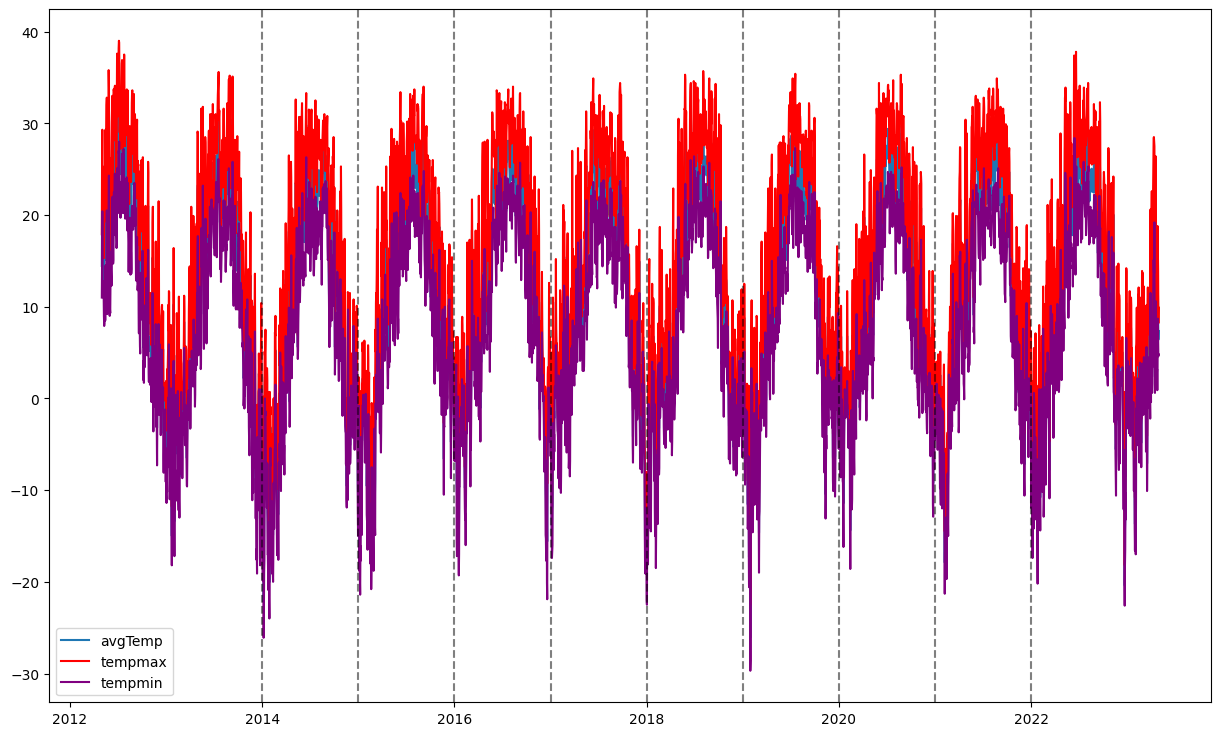

In [ ]:
plt.figure(figsize=(15,9))
temp, = plt.plot(data['avgTemp'])
tempmax, = plt.plot(data['tempmax'], color='red')
tempmin, = plt.plot(data['tempmin'], color='purple')

for year in range(2014, 2023):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)

plt.legend(['avgTemp', 'tempmax','tempmin'], fontsize=10)

In [ ]:
## Normalize
avgs = data.mean()
devs = data.std()

In [ ]:
for col in data.columns:
    data[col] = (data[col] - avgs.loc[col]) / devs.loc[col]

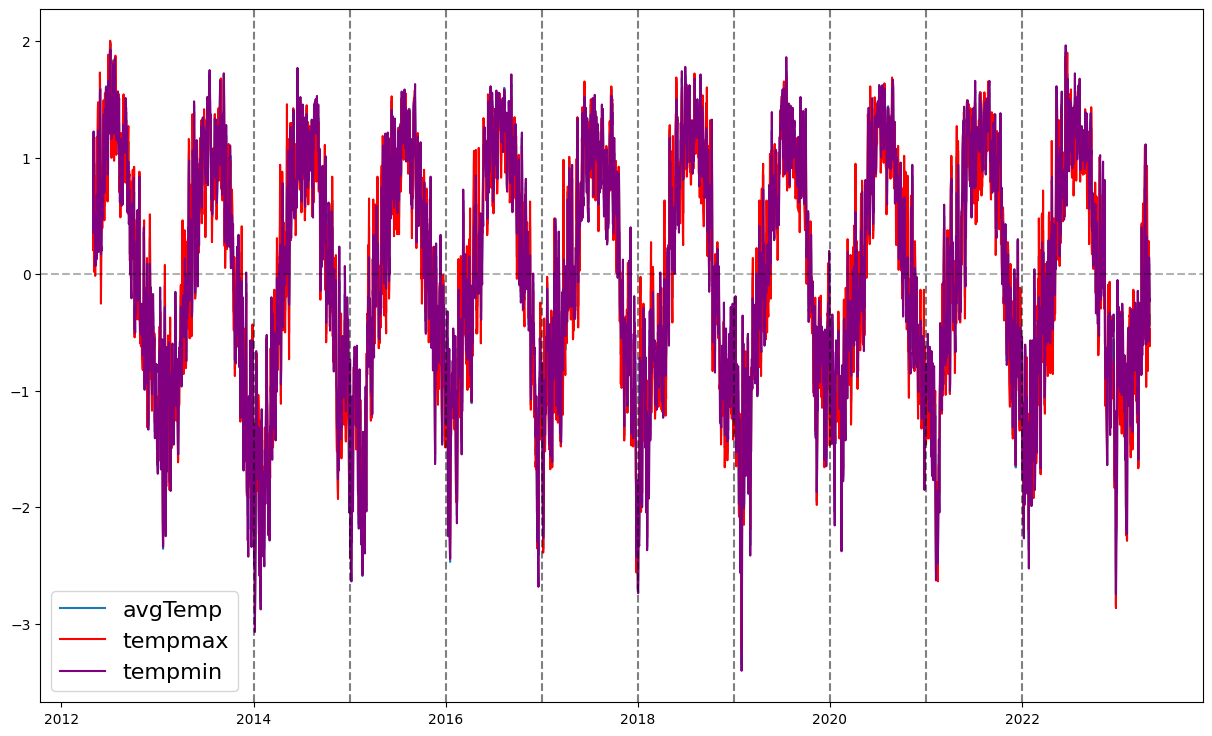

In [ ]:
plt.figure(figsize=(15,9))
temp, = plt.plot(data['avgTemp'])
tempmax, = plt.plot(data['tempmax'], color='red')
tempmin, = plt.plot(data['tempmin'], color='purple')

for year in range(2014, 2023):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

plt.legend(['avgTemp', 'tempmax','tempmin'], fontsize=16)

In [ ]:
### Remove the trend
data = data.diff().dropna()

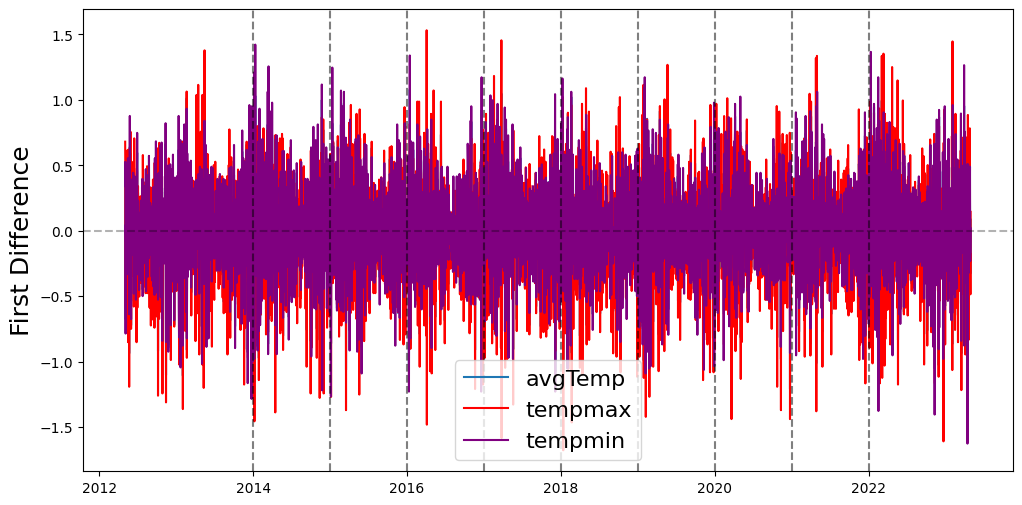

In [ ]:
plt.figure(figsize=(12,6))
temp, = plt.plot(data['avgTemp'])
tempmax, = plt.plot(data['tempmax'], color='red')
tempmin, = plt.plot(data['tempmin'], color='purple')

for year in range(2014, 2023):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['avgTemp', 'tempmax','tempmin'], fontsize=16)

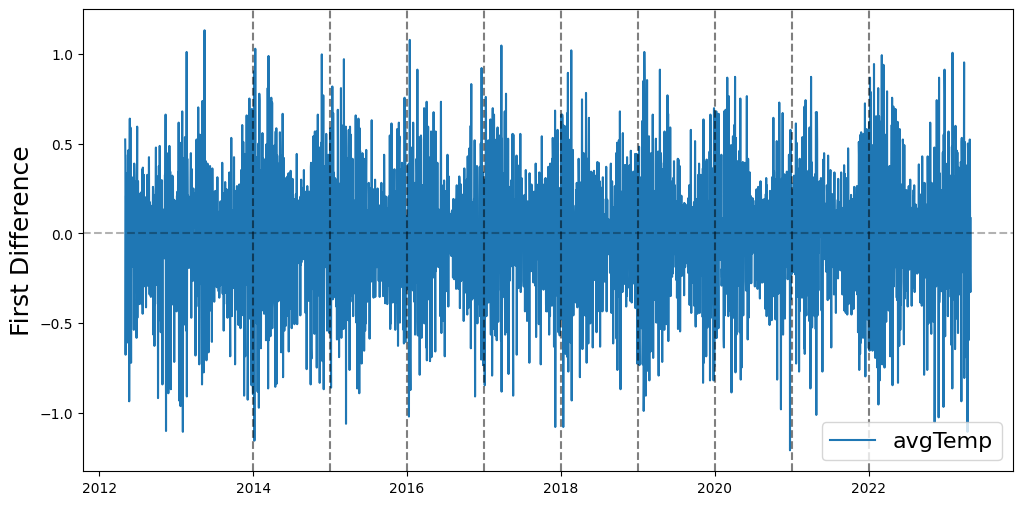

In [ ]:
plt.figure(figsize=(12,6))
temp, = plt.plot(data['avgTemp'])

for year in range(2014, 2023):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['avgTemp'], fontsize=16)

In [ ]:
###Remove Increasing Volatility
annual_volatility = data.groupby(data.index.year).std()
annual_volatility

,tempmax,tempmin,avgTemp
datetime,,,
2012,0.382300,0.307957,0.302852
2013,0.395627,0.358404,0.334442
2014,0.406663,0.377511,0.354736
2015,0.382815,0.350271,0.322641
2016,0.377644,0.324871,0.310031
2017,0.383412,0.342370,0.315549
2018,0.396878,0.318836,0.312527
2019,0.407410,0.353456,0.335555
2020,0.386346,0.301255,0.304234


In [ ]:
data['avgTemp_annual_vol'] = data.index.map(lambda d: annual_volatility.loc[d.year, 'avgTemp'])
data['tempmax_annual_vol'] = data.index.map(lambda d: annual_volatility.loc[d.year, 'tempmax'])
data['tempmin_annual_vol'] = data.index.map(lambda d: annual_volatility.loc[d.year, 'tempmin'])

In [ ]:
data

,tempmax,tempmin,avgTemp,avgTemp_annual_vol,tempmax_annual_vol,tempmin_annual_vol
datetime,,,,,,
2012-05-02,0.680969,0.341810,0.524230,0.302852,0.382300,0.307957
2012-05-03,0.289412,0.526572,0.407735,0.302852,0.382300,0.307957
2012-05-04,-0.561800,-0.785239,-0.676571,0.302852,0.382300,0.307957
2012-05-05,-0.595848,0.046191,-0.291239,0.302852,0.382300,0.307957
2012-05-06,0.476679,-0.083143,0.210588,0.302852,0.382300,0.307957
...,...,...,...,...,...,...
2023-04-27,0.783115,0.230953,0.524230,0.372836,0.448238,0.397109
2023-04-28,-0.246851,0.489620,0.107534,0.372836,0.448238,0.397109
2023-04-29,-0.170242,-0.230953,-0.201627,0.372836,0.448238,0.397109


In [ ]:
data['avgTemp'] = data['avgTemp'] / data['avgTemp_annual_vol']
data['tempmax'] = data['tempmax'] / data['tempmax_annual_vol']
data['tempmin'] = data['tempmin'] / data['tempmin_annual_vol']

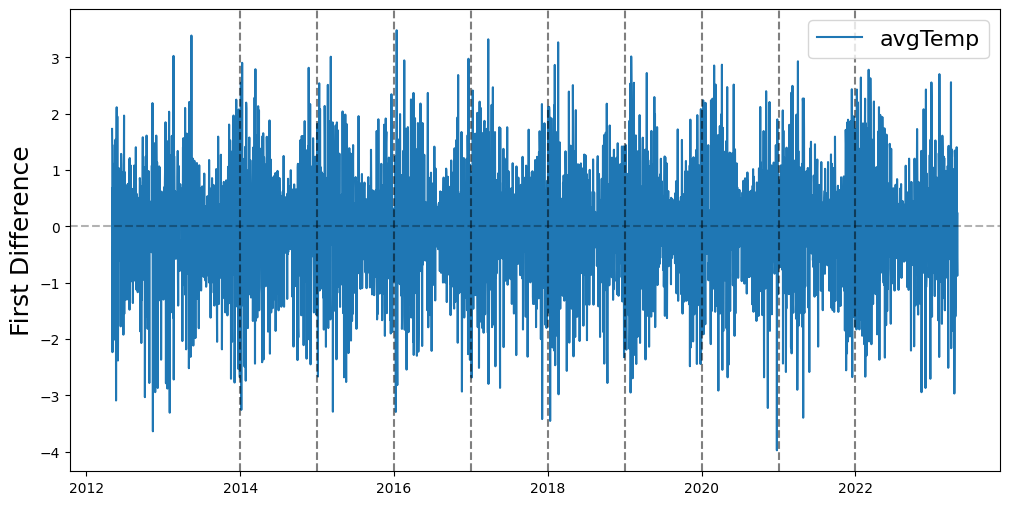

In [ ]:
plt.figure(figsize=(12,6))
temp, = plt.plot(data['avgTemp'])

for year in range(2014, 2023):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['avgTemp'], fontsize=16)

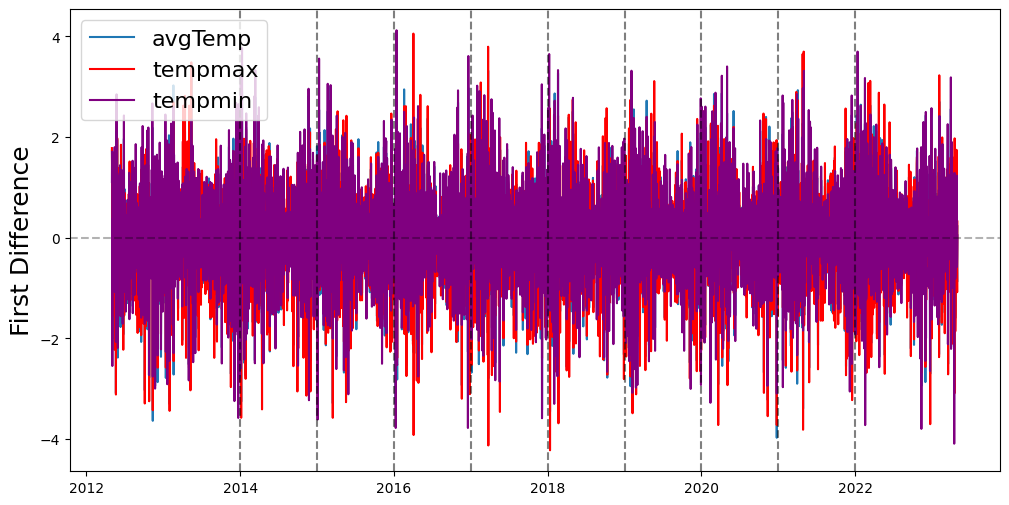

In [ ]:
plt.figure(figsize=(12,6))
avgTemp, = plt.plot(data['avgTemp'])
tempmax, = plt.plot(data['tempmax'], color='red')
tempmin, = plt.plot(data['tempmin'], color='purple')

for year in range(2014, 2023):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['avgTemp', 'tempmax','tempmin'], fontsize=16)

In [ ]:
##Remove Seasonality
month_avgs = data.groupby(data.index.month).mean()

In [ ]:
print(month_avgs)

           tempmax   tempmin   avgTemp  avgTemp_annual_vol  \
datetime                                                     
1         0.004192  0.002034  0.003789            0.328918   
2         0.051439  0.025749  0.046389            0.328777   
3         0.042942  0.064210  0.059523            0.328918   
4         0.014920  0.030080  0.025308            0.328918   
5         0.059814  0.062985  0.069878            0.322761   
6         0.040040  0.054606  0.053711            0.322556   
7        -0.012701 -0.013549 -0.015136            0.322556   
8         0.000735 -0.000137  0.000684            0.322556   
9        -0.053238 -0.060322 -0.064789            0.322556   
10       -0.059643 -0.071540 -0.074561            0.322556   
11       -0.026987 -0.035978 -0.035855            0.322556   
12       -0.062736 -0.061655 -0.071447            0.322556   

          tempmax_annual_vol  tempmin_annual_vol  
datetime                                          
1                   0.398217 

In [ ]:
data['avgTemp_month_avg'] = data.index.map(lambda d: month_avgs.loc[d.month, 'avgTemp'])
data['tempmax_month_avg'] = data.index.map(lambda d: month_avgs.loc[d.month, 'tempmax'])
data['tempmin_month_avg'] = data.index.map(lambda d: month_avgs.loc[d.month, 'tempmin'])

In [ ]:
data

,tempmax,tempmin,avgTemp,avgTemp_annual_vol,tempmax_annual_vol,tempmin_annual_vol,avgTemp_month_avg,tempmax_month_avg,tempmin_month_avg
datetime,,,,,,,,,
2012-05-02,1.781242,1.109929,1.730976,0.302852,0.382300,0.307957,0.069878,0.059814,0.062985
2012-05-03,0.757028,1.709890,1.346315,0.302852,0.382300,0.307957,0.069878,0.059814,0.062985
2012-05-04,-1.469524,-2.549836,-2.233995,0.302852,0.382300,0.307957,0.069878,0.059814,0.062985
2012-05-05,-1.558586,0.149990,-0.961653,0.302852,0.382300,0.307957,0.069878,0.059814,0.062985
2012-05-06,1.246869,-0.269983,0.695349,0.302852,0.382300,0.307957,0.069878,0.059814,0.062985
...,...,...,...,...,...,...,...,...,...
2023-04-27,1.747096,0.581585,1.406061,0.372836,0.448238,0.397109,0.025308,0.014920,0.030080
2023-04-28,-0.550715,1.232961,0.288423,0.372836,0.448238,0.397109,0.025308,0.014920,0.030080
2023-04-29,-0.379803,-0.581585,-0.540793,0.372836,0.448238,0.397109,0.025308,0.014920,0.030080


In [ ]:
data['avgTemp'] =data['avgTemp'] - data['avgTemp_month_avg']
data['tempmax'] =data['tempmax'] - data['tempmax_month_avg']
data['tempmin'] =data['tempmin'] - data['tempmin_month_avg']

In [ ]:
data

,tempmax,tempmin,avgTemp,avgTemp_annual_vol,tempmax_annual_vol,tempmin_annual_vol,avgTemp_month_avg,tempmax_month_avg,tempmin_month_avg
datetime,,,,,,,,,
2012-05-02,1.721428,1.046944,1.661099,0.302852,0.382300,0.307957,0.069878,0.059814,0.062985
2012-05-03,0.697214,1.646905,1.276437,0.302852,0.382300,0.307957,0.069878,0.059814,0.062985
2012-05-04,-1.529338,-2.612820,-2.303872,0.302852,0.382300,0.307957,0.069878,0.059814,0.062985
2012-05-05,-1.618400,0.087006,-1.031531,0.302852,0.382300,0.307957,0.069878,0.059814,0.062985
2012-05-06,1.187056,-0.332967,0.625472,0.302852,0.382300,0.307957,0.069878,0.059814,0.062985
...,...,...,...,...,...,...,...,...,...
2023-04-27,1.732176,0.551506,1.380752,0.372836,0.448238,0.397109,0.025308,0.014920,0.030080
2023-04-28,-0.565635,1.202882,0.263114,0.372836,0.448238,0.397109,0.025308,0.014920,0.030080
2023-04-29,-0.394723,-0.611665,-0.566101,0.372836,0.448238,0.397109,0.025308,0.014920,0.030080


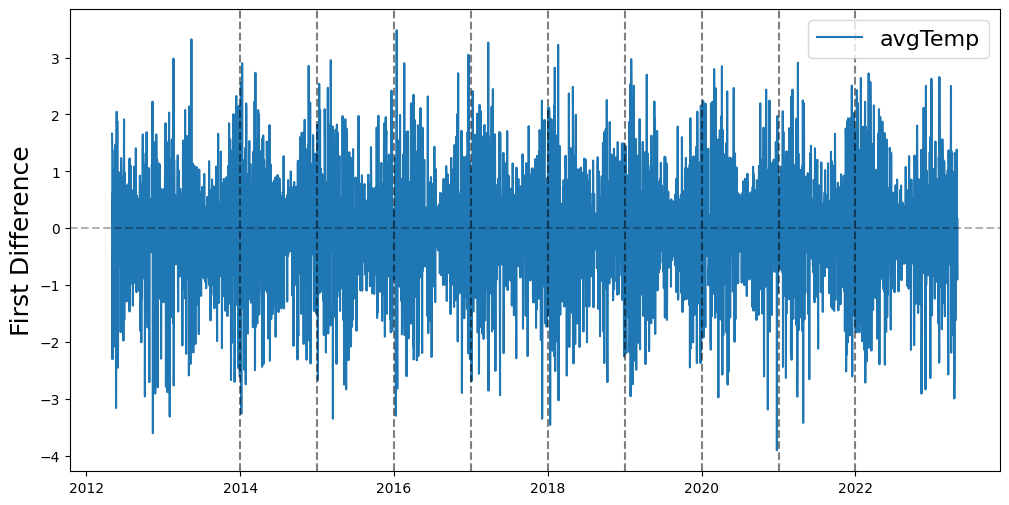

In [ ]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(data['avgTemp'])

for year in range(2014, 2023):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['avgTemp'], fontsize=16)

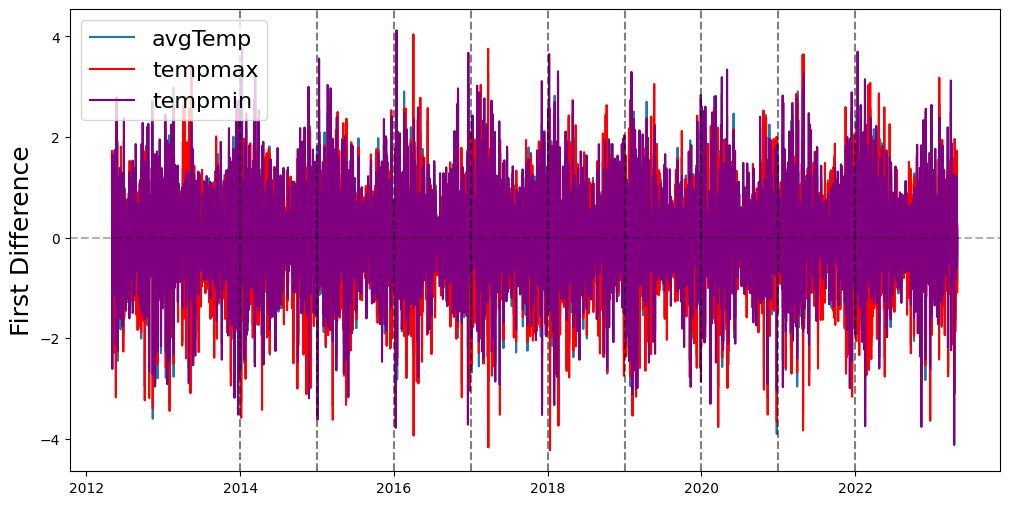

In [ ]:
plt.figure(figsize=(12,6))
avgTemp, = plt.plot(data['avgTemp'])
tempmax, = plt.plot(data['tempmax'], color='red')
tempmin, = plt.plot(data['tempmin'], color='purple')

for year in range(2014, 2023):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['avgTemp', 'tempmax','tempmin'], fontsize=16)

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


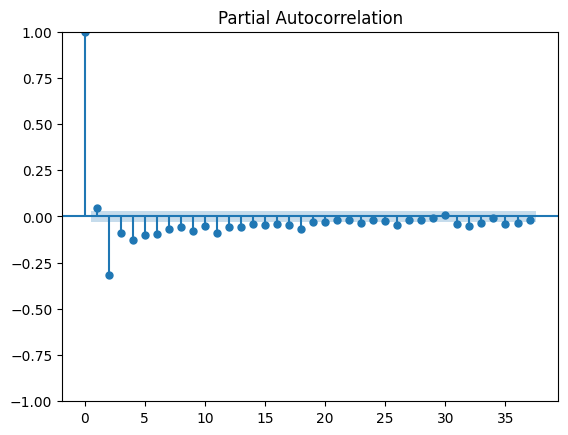

In [ ]:
###PACF - avgTemp
plot_pacf(data['avgTemp'])
plt.show()

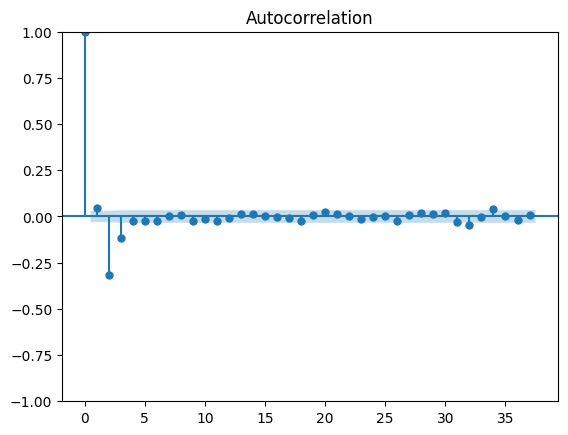

In [ ]:
plot_acf(data['avgTemp'])
plt.show()

So consider an AR(8)

Correlation between "avgTemp" and lagged "tempmax" 


In [ ]:
for lag in range(1, 8):
    avgTemp_series = data['avgTemp'].iloc[lag:]
    lagged_tempmax_series = data['tempmax'].iloc[:-lag]
    print('Lag: %s'%lag)
    print(pearsonr(avgTemp_series, lagged_tempmax_series))
    print('------')

Lag: 1
PearsonRResult(statistic=0.09555161531942039, pvalue=1.3008635216924094e-09)
------
Lag: 2
PearsonRResult(statistic=-0.27627314726911617, pvalue=2.9515258191098574e-71)
------
Lag: 3
PearsonRResult(statistic=-0.10581455845771962, pvalue=1.807438012201986e-11)
------
Lag: 4
PearsonRResult(statistic=-0.028239884988871145, pvalue=0.07365564669357749)
------
Lag: 5
PearsonRResult(statistic=-0.0017134699907077342, pvalue=0.9136006274068541)
------
Lag: 6
PearsonRResult(statistic=-0.04487350240939426, pvalue=0.00447619152817869)
------
Lag: 7
PearsonRResult(statistic=-0.004878040010624815, pvalue=0.7574696569970931)
------


Correlation between "avgTemp" and lagged "tempmin"

In [ ]:
for lag in range(1, 8):
    avgTemp_series = data['avgTemp'].iloc[lag:]
    lagged_tempmin_series = data['tempmin'].iloc[:-lag]
    print('Lag: %s'%lag)
    print(pearsonr(avgTemp_series, lagged_tempmin_series))
    print('------')

Lag: 1
PearsonRResult(statistic=-0.02829183775110164, pvalue=0.07301951189509791)
------
Lag: 2
PearsonRResult(statistic=-0.2705290700422464, pvalue=2.7368364795354734e-68)
------
Lag: 3
PearsonRResult(statistic=-0.09477003318658582, pvalue=1.7884941264245278e-09)
------
Lag: 4
PearsonRResult(statistic=-0.01188792187822519, pvalue=0.4515274562494765)
------
Lag: 5
PearsonRResult(statistic=-0.044879546982089756, pvalue=0.004465841109281854)
------
Lag: 6
PearsonRResult(statistic=0.0034021863301720596, pvalue=0.8294536918657195)
------
Lag: 7
PearsonRResult(statistic=0.008003546743475354, pvalue=0.6123855503128685)
------


 Fit a VAR Model

In [ ]:
data = data[['avgTemp', 'tempmax','tempmin']]

In [ ]:
model = VAR(data)

In [ ]:
model_fit = model.fit(maxlags=12)

In [ ]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 19, May, 2023
Time:                     23:50:36
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -8.96138
Nobs:                     4005.00    HQIC:                  -9.07402
Log likelihood:           1357.01    FPE:                0.000107733
AIC:                     -9.13586    Det(Omega_mle):     0.000104801
--------------------------------------------------------------------
Results for equation avgTemp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.000400         0.014345            0.028           0.978
L1.avgTemp         -0.627480         0.863166           -0.727           0.467
L1.tempmax          0.446774         0.553274            0.808    

In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX
var_model = VARMAX(data, order=(4,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                                   Statespace Model Results                                  
Dep. Variable:     ['avgTemp', 'tempmax', 'tempmin']   No. Observations:                 4017
Model:                                        VAR(4)   Log Likelihood                 972.835
                                         + intercept   AIC                          -1855.670
Date:                               Fri, 19 May 2023   BIC                          -1572.247
Time:                                       23:51:39   HQIC                         -1755.225
Sample:                                   05-02-2012                                         
                                        - 05-01-2023                                         
Covariance Type:                                 opg                                         
Ljung-Box (L1) (Q):       0.64, 2.21, 0.98   Jarque-Bera (JB):   97.69, 75.30, 2732.15
Prob(Q):                  0.42, 0.14, 0.32   Prob(JB):             

In [ ]:
n_forecast = 14
predict = fitted_model.get_prediction(start=len(data),end=len(data) + n_forecast-1)#start="2023-02-05",end='2023-15-05')

predictions=predict.predicted_mean

In [ ]:
predictions.columns=['tempmax_predicted','avgTemp_predicted','tempmin_predicted']
predictions

,tempmax_predicted,avgTemp_predicted,tempmin_predicted
2023-05-02,0.288593,0.453347,0.003779
2023-05-03,0.111933,0.017046,0.195932
2023-05-04,-0.000875,-0.019938,0.022672
2023-05-05,-0.062715,-0.112000,0.016303
2023-05-06,-0.054797,-0.020472,-0.081676
2023-05-07,0.000104,0.029890,-0.036246
2023-05-08,0.024942,0.016426,0.028252
2023-05-09,0.013971,0.005861,0.019978
2023-05-10,0.001469,-0.006252,0.010437
2023-05-11,-0.007882,-0.004125,-0.010321


In [ ]:
data_vs_pred=pd.concat([data,predictions],axis=1)

<Axes: >

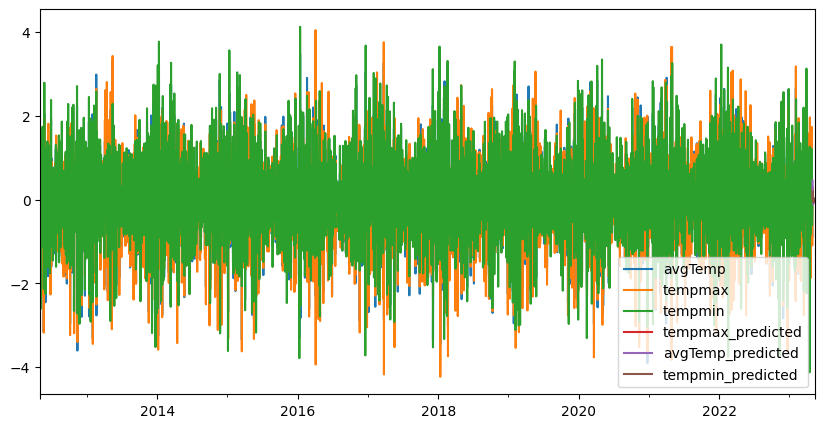

In [ ]:
data_vs_pred.plot(figsize=(10,5))

In [ ]:
train_df=data[:-14]
test_df=data[-14:]
train_df.tail()
test_df

,avgTemp,tempmax,tempmin
datetime,,,
2023-04-18,1.320664,1.960058,0.156028
2023-04-19,1.212506,0.896608,1.249408
2023-04-20,1.272594,1.333382,0.830667
2023-04-21,-1.623651,-1.875956,-0.844299
2023-04-22,-1.359264,-1.515143,-0.774509
2023-04-23,-0.578119,-0.584625,-0.402294
2023-04-24,0.695748,1.143480,-0.053343
2023-04-25,-0.337766,-0.698566,0.202555
2023-04-26,-0.133467,0.250943,-0.565138


In [ ]:
model = VAR(test_df)#.diff()[1:])

In [ ]:
sorted_order=model.select_order(maxlags=1)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0     -17.36*     -17.23*  2.899e-08*     -17.38*
1      -17.10      -16.58   3.993e-08      -17.21
-------------------------------------------------


In [ ]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

<Axes: >

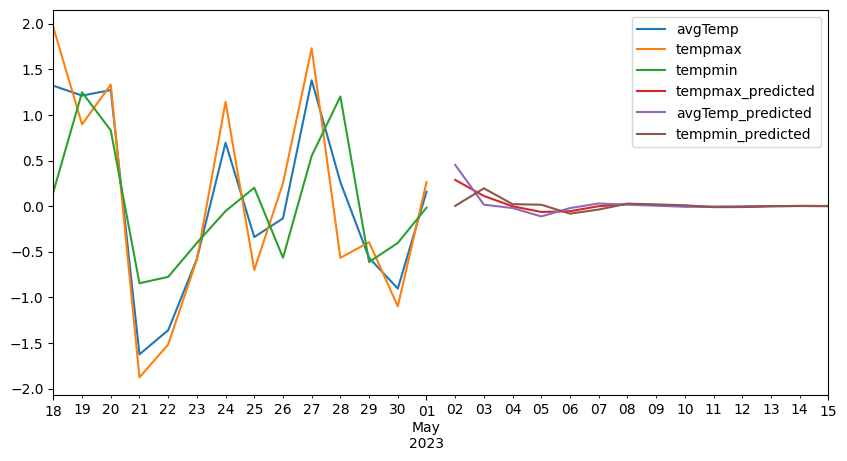

In [ ]:
test_vs_pred.plot(figsize=(10,5))